
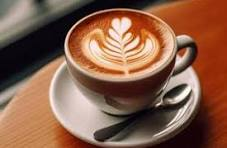

In [ ]:
#@title Project
import requests
from IPython.display import Image, display
from IPython.display import HTML

# Direct image URL
image_url = "https://drive.google.com/uc?export=view&id=1q0SIEYAwLOj8YZH0_BHc2uboo2NQkJDd"

# Download the image
response = requests.get(image_url)
with open('image.jpg', 'wb') as file:
    file.write(response.content)

import base64

# Convert the image to a base64 string
with open("image.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Create the HTML code with the base64 image
html_code = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Header</title>
    <!-- Include Font Awesome -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: flex-start; /* Align items to the top */
            /*align-items: center;*/
            padding: 20px;
            background-color: #f4f4f4;
            border-bottom: 2px solid #ccc;
        }}
        .header img {{
            border-radius: 50%;
            width: 100px;
            height: 100px;
            object-fit: cover;
            margin-right: 40px;
            box-shadow: 0 0 20px brown; /* Glowing effect */
            vertical-align: top;
        }}
        .header .text-container {{
            display: flex;
            flex-direction: column;
        }}
        .header h1 {{
            margin: 0;
            font-size: 2em;
            color: #454545;
        }}
        .header p {{
            margin: 5px 0 0 0;
            font-size: 1em;
            color: #666;
        }}
        .header .social-icons {{
            margin-top: 10px;
        }}
        .header .social-icons a {{
            margin-right: 10px;
            color: #666;
            text-decoration: none;
            font-size: 1.5em;
        }}
        .header .social-icons a:hover {{
            color: #000;
        }}
    </style>
</head>
<body>
    <header class="header">
        <img src="data:image/jpeg;base64,{encoded_string}" alt="Profile Picture">
        <div class="text-container">


            <h1>Coffee Sales</h1>

            <p>Tandra Malm</p>

            <div class="social-icons">


                <a href="https://www.linkedin.com/in/tandra-malm-89a373128/" target="_blank"><i class="fab fa-linkedin"></i></a>
                <a href="mailto:tandra_malm@hotmail.com"><i class="fas fa-envelope"></i>



            </div>
        </div>
    </header>
</body>
</html>
"""

# Display the HTML code in the Jupyter/Colab notebook
display(HTML(html_code))

# Soft skills

##Step 1. Kick-off meeting with management

The coffee shop owner wants to understand key sales patterns to make informed decisions. They are asking which coffee types are the best sellers overall, how customers are paying—whether mostly by cash or card—what days of the week bring in the most revenue, and which times of day tend to be the busiest in terms of sales. This information will help them identify customer preferences, adjust inventory and staffing levels, and create targeted promotions to boost overall sales performance.

##Step 2. Documenting a task during a meeting

###Meeting documentation template

**Goal**:
- Which coffee products are selling the most,

- How customers are paying,

- What days drive the most revenue,

- What time periods are the busiest in terms of sales.

**Visualisation**
(bar, pie, column etc.):

<figure>
  <left>
    <img src='https://drive.google.com/uc?export=view&id=15fIbp6qRXgfL6vHfpkPkIG4zCv15qxiD' width='400'/>
    <figcaption>Popular types of visuals</figcaption>
  </left>
</figure>


- Bar plot 1: Coffee Sales by Coffee Type
  - Numeric column and aggregation: total money
  - Categorical column: coffee_name
  - Active filters: None


- Bar plot 2: Sales by payment method
  - Numeric column and aggregation: total money
  - Categorical column: cash type
  - Active filters: none

- Bar plot 3: Total Sales by day of the week
  - Numeric column and aggregation: total money
  - Categorical column: day of the week
  - Active filters: none

- Bar plot 4: hourly sales trend
  - Numeric column and aggregation: total money
  - Categorical column: hour of day
  - Active filters: none


#Hard skills

In [ ]:
# Step 1: Import the required libraries
import pandas as pd
import gdown

# Step 2: Google Drive File ID of the CSV
# Replace this ID with the actual one from your own Google Drive link
file_id = '1TbyTKLdtlSs09ZqZevcGAXFDc6uwOvcA'

# Step 3: Generate the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Step 4: Download the file to your environment
output_file = 'index_1.csv'
gdown.download(download_url, output_file, quiet=False)

# Step 5: Load the CSV into a DataFrame
df = pd.read_csv(output_file)

# Step 6: Activate ipython-sql for SQL queries
%load_ext sql

# Step 7: Save the DataFrame to a SQLite database file
database_filename = 'coffee_sales.db'
df.to_sql('coffee_sales', f'sqlite:///{database_filename}', if_exists='replace', index=False)

# Step 8: Connect to the database using SQL magic
%sql sqlite:///coffee_sales.db

# Step 9: Fix for styling (as per recent notebook SQL change)
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

Downloading...
From: https://drive.google.com/uc?id=1TbyTKLdtlSs09ZqZevcGAXFDc6uwOvcA
To: /content/index_1.csv
100%|██████████| 279k/279k [00:00<00:00, 4.89MB/s]

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
#@title Step 2. SQL — Query the data
# Query the data to see if it works

project3_data = %sql SELECT * FROM coffee_sales;

   sqlite:///bikes_data.db
 * sqlite:///coffee_sales.db
Done.


In [ ]:
# Get the data to Python environment
# Convert project_data to pandas DataFrame
df = pd.DataFrame(project3_data)

#Display the first 10 rows of the DataFrame
print(df.head(10))



         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   
5  2024-03-01  2024-03-01 15:39:47.726      card  ANON-0000-0000-0005   33.8   
6  2024-03-01  2024-03-01 16:19:02.756      card  ANON-0000-0000-0006   38.7   
7  2024-03-01  2024-03-01 18:39:03.580      card  ANON-0000-0000-0007   33.8   
8  2024-03-01  2024-03-01 19:22:01.762      card  ANON-0000-0000-0008   38.7   
9  2024-03-01  2024-03-01 19:23:15.887      card  ANON-0000-0000-0008   33.8   

           coffee_name  
0                Latte  
1        Hot Chocolate  
2        Hot Chocolate  
3            Americ

In [ ]:
# Display basic info about the DataFrame
print("Basic DataFrame Info:")
df.info()
print("\n")

# Display summary statistics for numeric columns
print("Summary Statistics (Numeric Columns):")
print(df.describe())
print("\n")

# Display number of missing values per column
print("Missing Values Per Column:")
print(df.isnull().sum())

Basic DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


Summary Statistics (Numeric Columns):
             money
count  3636.000000
mean     31.746859
std       4.919926
min      18.120000
25%      27.920000
50%      32.820000
75%      35.760000
max      40.000000


Missing Values Per Column:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [ ]:
# Handle missing values in 'card' column
# Fill missing with "No Card"
df['card'] = df['card'].fillna('No Card')


# 3. Remove duplicate rows (if any)
df = df.drop_duplicates()

# 4. Check and remove invalid or zero/negative 'money' values
df = df[df['money'] > 0]

# 5. Standardize categorical columns: lowercase and strip whitespace
df['cash_type'] = df['cash_type'].str.lower().str.strip()
df['coffee_name'] = df['coffee_name'].str.lower().str.strip()

print(df['cash_type'].unique())
print(df['coffee_name'].unique())

print(df['datetime'].head(10))
print(df['datetime'].dtype)

['card' 'cash']
['latte' 'hot chocolate' 'americano' 'americano with milk' 'cocoa'
 'cortado' 'espresso' 'cappuccino']
0    2024-03-01 10:15:50.520
1    2024-03-01 12:19:22.539
2    2024-03-01 12:20:18.089
3    2024-03-01 13:46:33.006
4    2024-03-01 13:48:14.626
5    2024-03-01 15:39:47.726
6    2024-03-01 16:19:02.756
7    2024-03-01 18:39:03.580
8    2024-03-01 19:22:01.762
9    2024-03-01 19:23:15.887
Name: datetime, dtype: object
object


In [ ]:
# Export the DataFrame to an Excel file
df.to_excel('coffee_output.xlsx', index=False)

print("Data exported successfully to 'coffee_output.xlsx'")

Data exported successfully to 'coffee_output.xlsx'


In [ ]:
#@title Tableau Dashboard
from IPython.display import HTML

HTML("""
<div class='tableauPlaceholder' id='viz1749220381458' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;CoffeeSales_17491921371660&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CoffeeSales_17491921371660&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;CoffeeSales_17491921371660&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1749220381458');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1877px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
""")


[Link Tableau](https://public.tableau.com/views/CoffeeSales_17491921371660/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

[Link PBI]()

**Goal**: Which coffee products are selling the most, see how customers are paying, what days drive the most revenue, and what time periods are the busiest in terms of sales.



**Assessment**: Latte is the top-performing product overall, followed closely by Americano with milk. Espresso is the least sold item, with a sales difference of 27,866 vs. 2,814, representing a 90% decrease compared to lattes.

While lattes dominate in total sales, sales between 8 AM and 2 PM show Americanos with milk as the most frequently purchased item during that period. After 2 PM until closing, lattes resume as the leading product. Espresso consistently remains the lowest-selling item across both time ranges.

The majority of transactions are completed via credit card, indicating a preference for card payments among customers.

In terms of hourly sales trends, 10 AM shows the highest sales volume, with a dip midday and a slight increase again around 4 PM.

Looking at total revenue by day of the week, Tuesdays generate the highest average sales, followed by Monday and Friday, which are nearly equal. Sunday consistently yields the lowest revenue.

Looking at monthly trends, March stands out as the highest-grossing month with $17,037, while January has the lowest at $6,399, reflecting a 166.2% increase in sales. Revenue fluctuates throughout the year, with another strong performance in October, and moderate dips during the summer months. This seasonal variation may suggest opportunities for promotions or targeted marketing during slower periods.


**Quick Summary Notes**:

- Top-Selling Product:

  - Latte is the highest-selling item overall.

  - Americano with milk ranks second.

- Lowest-Selling Product:

  - Espresso has the fewest sales (2,814), compared to lattes (27,866) — a 90% decrease.

- Time-Based Sales Trends:

  - 8 AM – 2 PM: Americano with milk is the top seller.

  - 2 PM – Close: Latte returns as the top performer.

  - Espresso remains the lowest seller in both time periods.

- Payment Method Insights:

  - The majority of sales are made via credit card.

- Hourly Sales Trends:

  - 10 AM sees the highest average daily sales.

  - Sales dip slightly midday and rise again around 4 PM.

- Daily Revenue Trends:

  - Tuesday generates the highest average revenue.

  - Monday and Friday follow closely behind.

  - Sunday has the lowest total revenue.

- Monthly Revenue
  - March: Highest revenue ($17,037).

  - January: Lowest revenue ($6,399).

  - 166.2% increase from January to March.

  - October is another strong month.

  - Summer months show fluctuating, mid-range sales.

